In [1]:
import os
import torch
import sys
sys.path.append('../../')

In [2]:
def set_num_threads(nt):
    "Get numpy (and others) to use `nt` threads"
    try: import mkl; mkl.set_num_threads(nt)
    except: pass
    torch.set_num_threads(nt)
    os.environ['IPC_ENABLE']='1'
    for o in ['OPENBLAS_NUM_THREADS','NUMEXPR_NUM_THREADS','OMP_NUM_THREADS','MKL_NUM_THREADS']:
        os.environ[o] = str(nt)

In [3]:
set_num_threads(4)

In [4]:
import libtiff
import imageio
import PIL
import numpy as np
import matplotlib.pyplot as plt
import fastai as fai
import fastai.vision as faiv
import fastai.callbacks as faic
import data.utils
import data.svd
from data import load

In [5]:
# Modify accordingly
path = faiv.Path('/home/alaa/Dropbox/BPHO Staff/USF/EM/')

# dataset_name = 'real-world_SEM'

lr_name = f'training/trainsets/lr/'
lr_path = path/f'{lr_name}'
# create list of crappified image filenames, sorted alphabetically
lr_files = sorted(list(lr_path.glob('*.tif')))

# hr_name = f'training/trainsets/hr/'
# hr_path = path/f'{hr_name}'
# hr_files = sorted(list(hr_path.glob('*.tif')))

print('Processing '+str(len(lr_files))+' files...')

Processing 99997 files...


In [6]:
# Set size for visualizations
fig_size = plt.rcParams["figure.figsize"]  # Get current size
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 24
plt.rcParams["figure.figsize"] = fig_size
print("Updated size:", fig_size)

Current size: [6.0, 4.0]
Updated size: [30, 24]


In [7]:
def bilinear_process(input_img_names, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for i, img_name in enumerate(input_img_names):
        input_img = data.utils.load_img(img_name)
        pred_img = data.utils.bilinear_upsample(input_img)
        pred_name = img_name.stem.replace('lr', 'bilinear') + '.tif'
        data.utils.save_img(pred_img, output_dir/pred_name)
        if i % 1000 == 0:
            print(f'Completed {i} Bilinear Crappifications')
            print(f'Last file saved in {output_dir/pred_name}')
    print("Bilinear Crappification Process Completed. Enjoy!")

In [8]:
bilin_dir = faiv.Path('/home/alaa/Dropbox/BPHO Staff/USF/EM/training/trainsets/bilinear')
bilinear_process(lr_files, bilin_dir)

Completed 0 Bilinear Crappifications
Last file saved in /home/alaa/Dropbox/BPHO Staff/USF/EM/training/trainsets/bilinear/EM_train_bilinear_00001.tif
Completed 1000 Bilinear Crappifications
Last file saved in /home/alaa/Dropbox/BPHO Staff/USF/EM/training/trainsets/bilinear/EM_train_bilinear_01001.tif
Completed 2000 Bilinear Crappifications
Last file saved in /home/alaa/Dropbox/BPHO Staff/USF/EM/training/trainsets/bilinear/EM_train_bilinear_02001.tif
Completed 3000 Bilinear Crappifications
Last file saved in /home/alaa/Dropbox/BPHO Staff/USF/EM/training/trainsets/bilinear/EM_train_bilinear_03001.tif
Completed 4000 Bilinear Crappifications
Last file saved in /home/alaa/Dropbox/BPHO Staff/USF/EM/training/trainsets/bilinear/EM_train_bilinear_04001.tif
Completed 5000 Bilinear Crappifications
Last file saved in /home/alaa/Dropbox/BPHO Staff/USF/EM/training/trainsets/bilinear/EM_train_bilinear_05001.tif
Completed 6000 Bilinear Crappifications
Last file saved in /home/alaa/Dropbox/BPHO Staff/US

Completed 57000 Bilinear Crappifications
Last file saved in /home/alaa/Dropbox/BPHO Staff/USF/EM/training/trainsets/bilinear/EM_train_bilinear_57001.tif
Completed 58000 Bilinear Crappifications
Last file saved in /home/alaa/Dropbox/BPHO Staff/USF/EM/training/trainsets/bilinear/EM_train_bilinear_58001.tif
Completed 59000 Bilinear Crappifications
Last file saved in /home/alaa/Dropbox/BPHO Staff/USF/EM/training/trainsets/bilinear/EM_train_bilinear_59001.tif
Completed 60000 Bilinear Crappifications
Last file saved in /home/alaa/Dropbox/BPHO Staff/USF/EM/training/trainsets/bilinear/EM_train_bilinear_60001.tif
Completed 61000 Bilinear Crappifications
Last file saved in /home/alaa/Dropbox/BPHO Staff/USF/EM/training/trainsets/bilinear/EM_train_bilinear_61001.tif
Completed 62000 Bilinear Crappifications
Last file saved in /home/alaa/Dropbox/BPHO Staff/USF/EM/training/trainsets/bilinear/EM_train_bilinear_62001.tif
Completed 63000 Bilinear Crappifications
Last file saved in /home/alaa/Dropbox/BPH

## Here We Validate A One-to-One Mapping between Bilinear-LR predictions and Original HR images through visualization

In [9]:
# Modify accordingly
path = faiv.Path('/home/alaa/Dropbox/BPHO Staff/USF/EM/')

bilin_name = f'training/trainsets/bilinear/'
bilin_path = path/f'{bilin_name}'
bilin_files = sorted(list(bilin_path.glob('*.tif')))

print('Processing '+str(len(bilin_files))+' files...')

Processing 99997 files...


In [15]:
# Set size for visualizations
fig_size = plt.rcParams["figure.figsize"]  # Get current size
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 40
plt.rcParams["figure.figsize"] = fig_size
print("Updated size:", fig_size)

Current size: [30.0, 30.0]
Updated size: [30, 40]


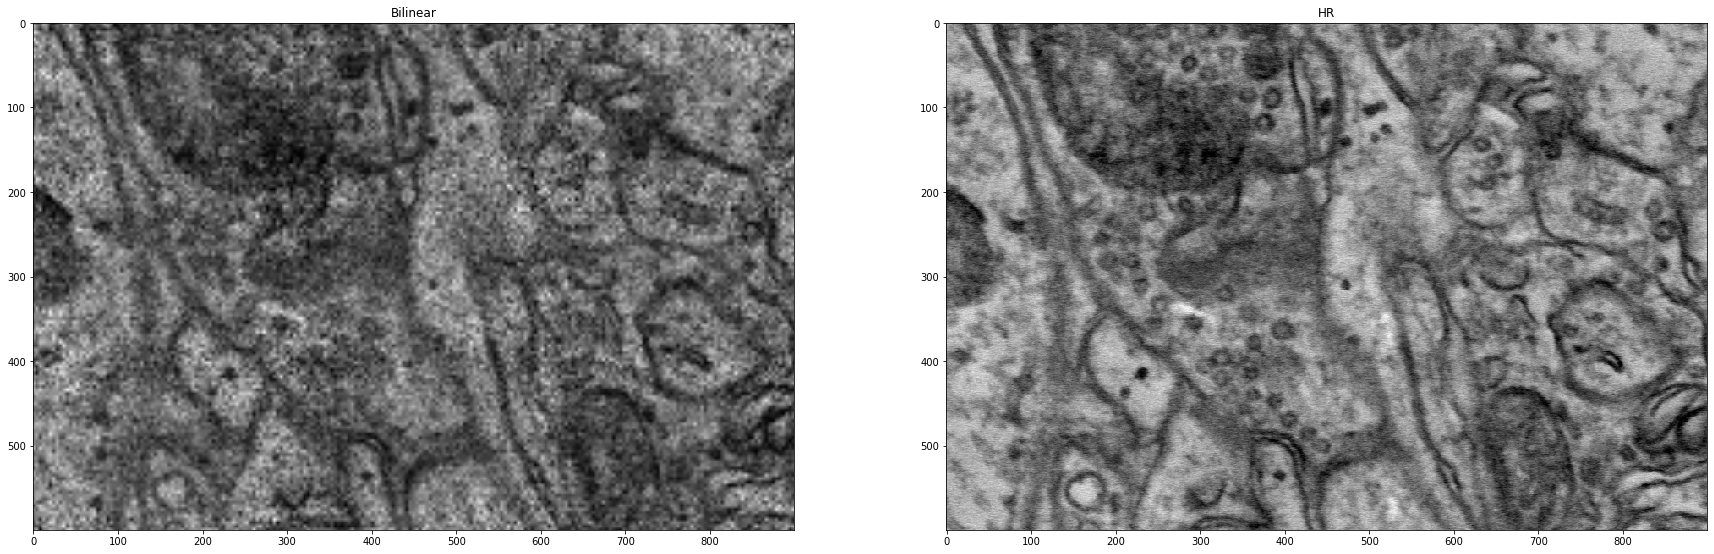

In [17]:
sn = 100 # image number
bilin_im = data.utils.load_img(bilin_files[sn]) # load image to tensor
hr_im = data.utils.load_img(str(bilin_files[sn]).replace("bilinear", "hr"))
f, axarr = plt.subplots(1,2) # create visualizations
axarr[0].imshow(np.squeeze(bilin_im), cmap=plt.cm.gray) # visualize image tensor
axarr[0].set_title("Bilinear")
axarr[1].imshow(np.squeeze(hr_im), cmap=plt.cm.gray) # visualize original image file
axarr[1].set_title("HR")
plt.show() # show visualization

## DEV Code

In [10]:
img = data.utils.load_img(lr_files[1])

In [11]:
img.shape

(1, 150, 225)

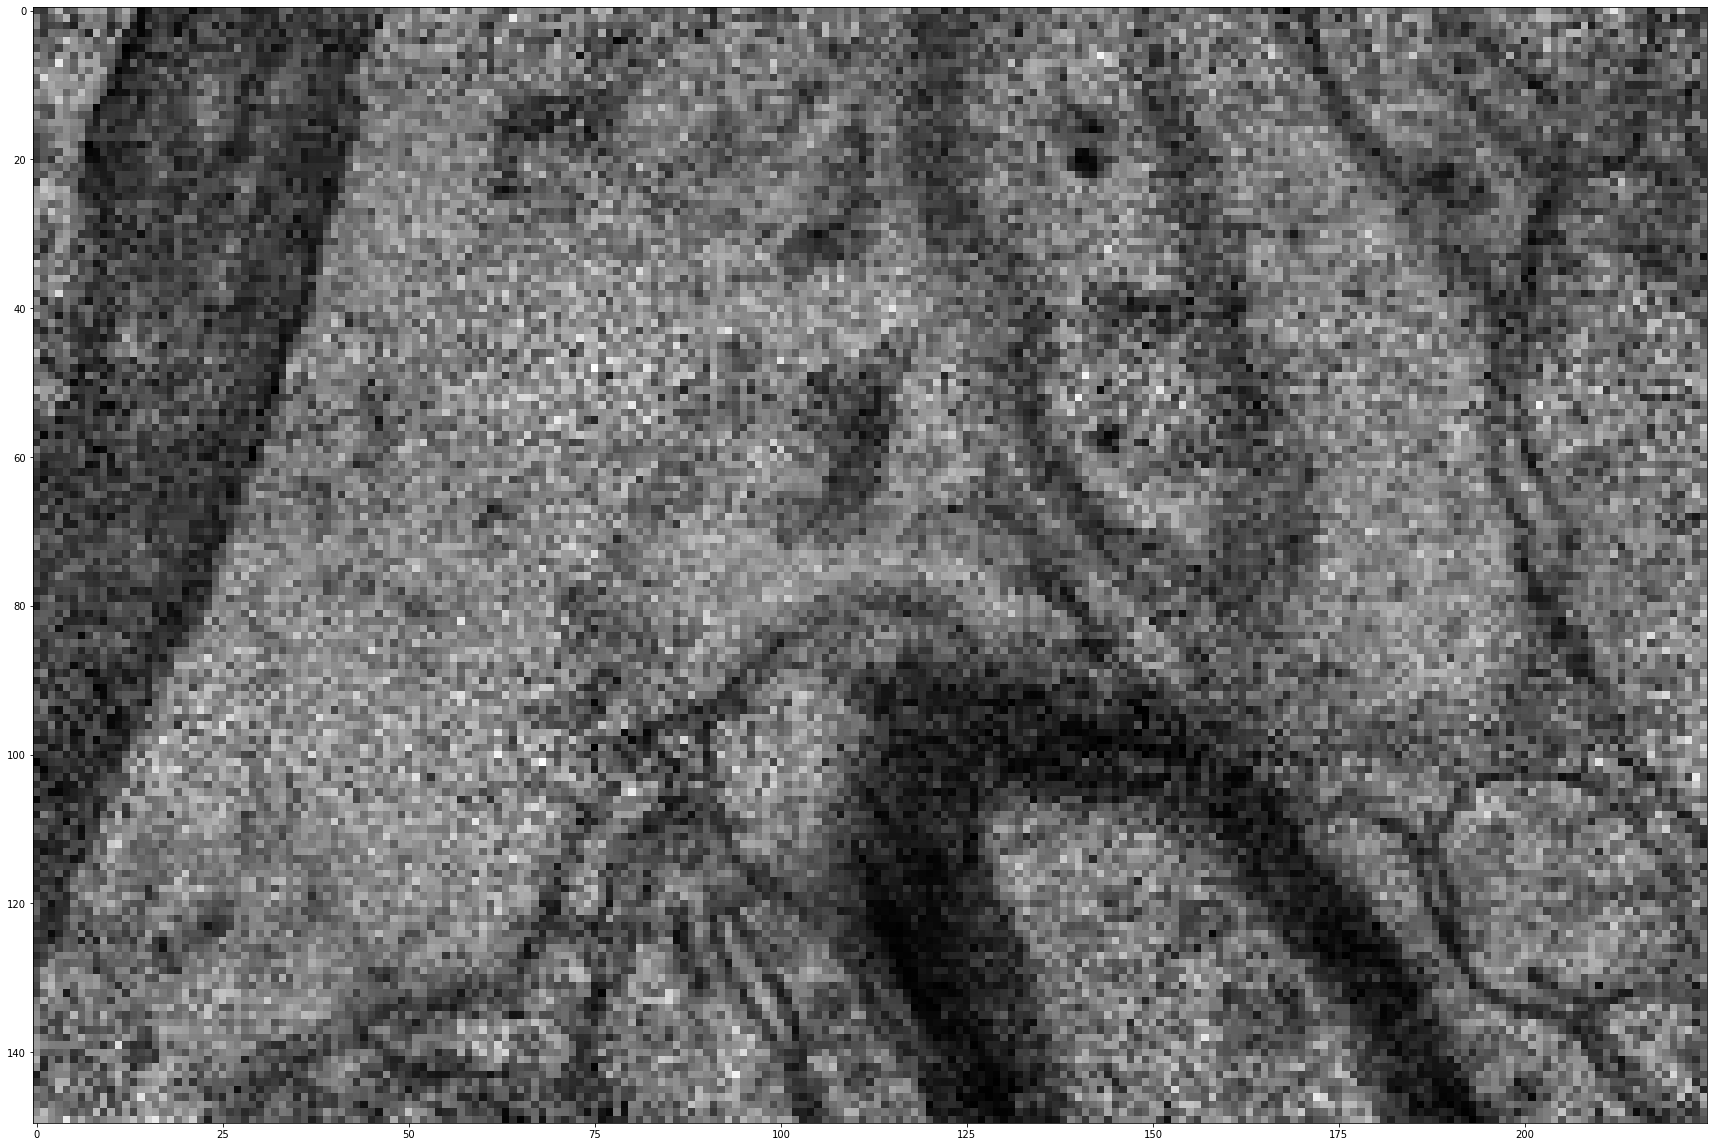

In [13]:
plt.imshow(np.squeeze(img), cmap=plt.cm.gray)

In [14]:
img_up = data.utils.bilinear_upsample(img)

In [15]:
img_up.shape

(1, 600, 900)

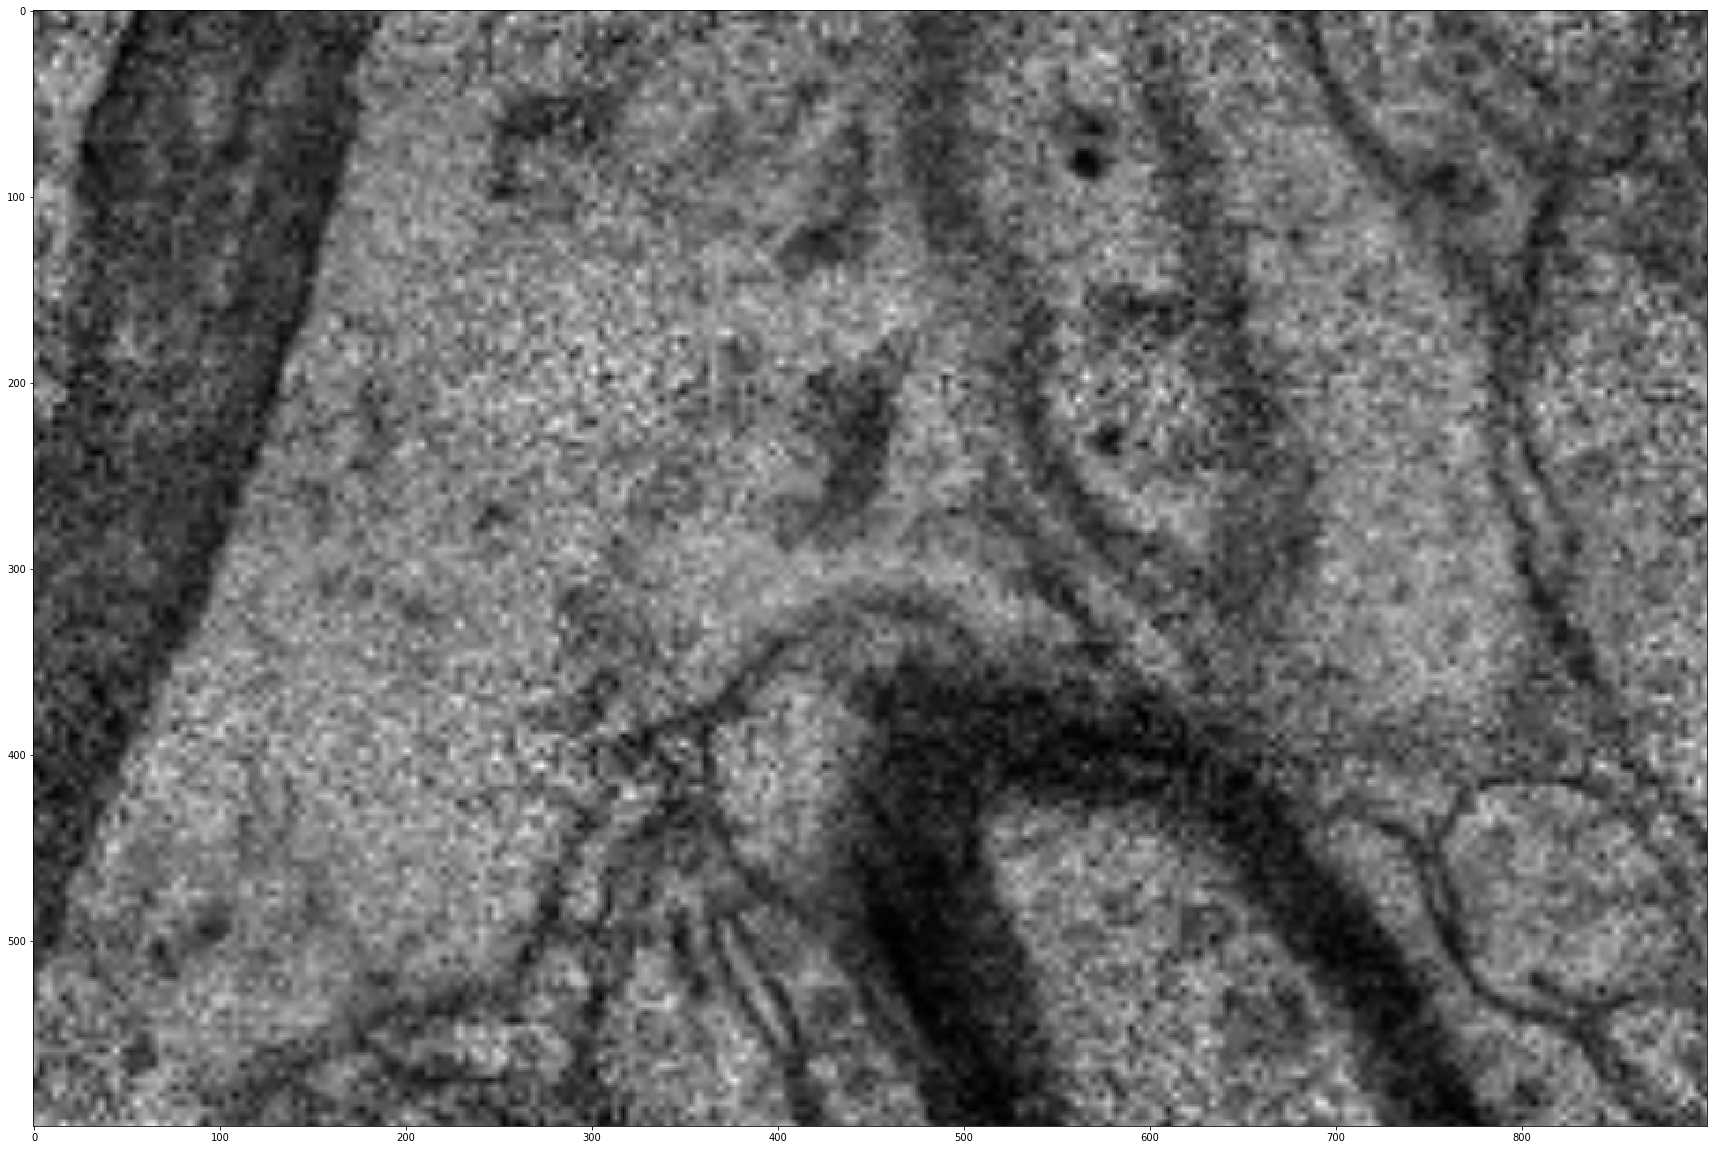

In [17]:
plt.imshow(np.squeeze(img_up), cmap=plt.cm.gray)

In [25]:
data.utils.save_img(img_up, "bilin_test.tif")

In [26]:
img_up = data.utils.load_img("bilin_test.tif")

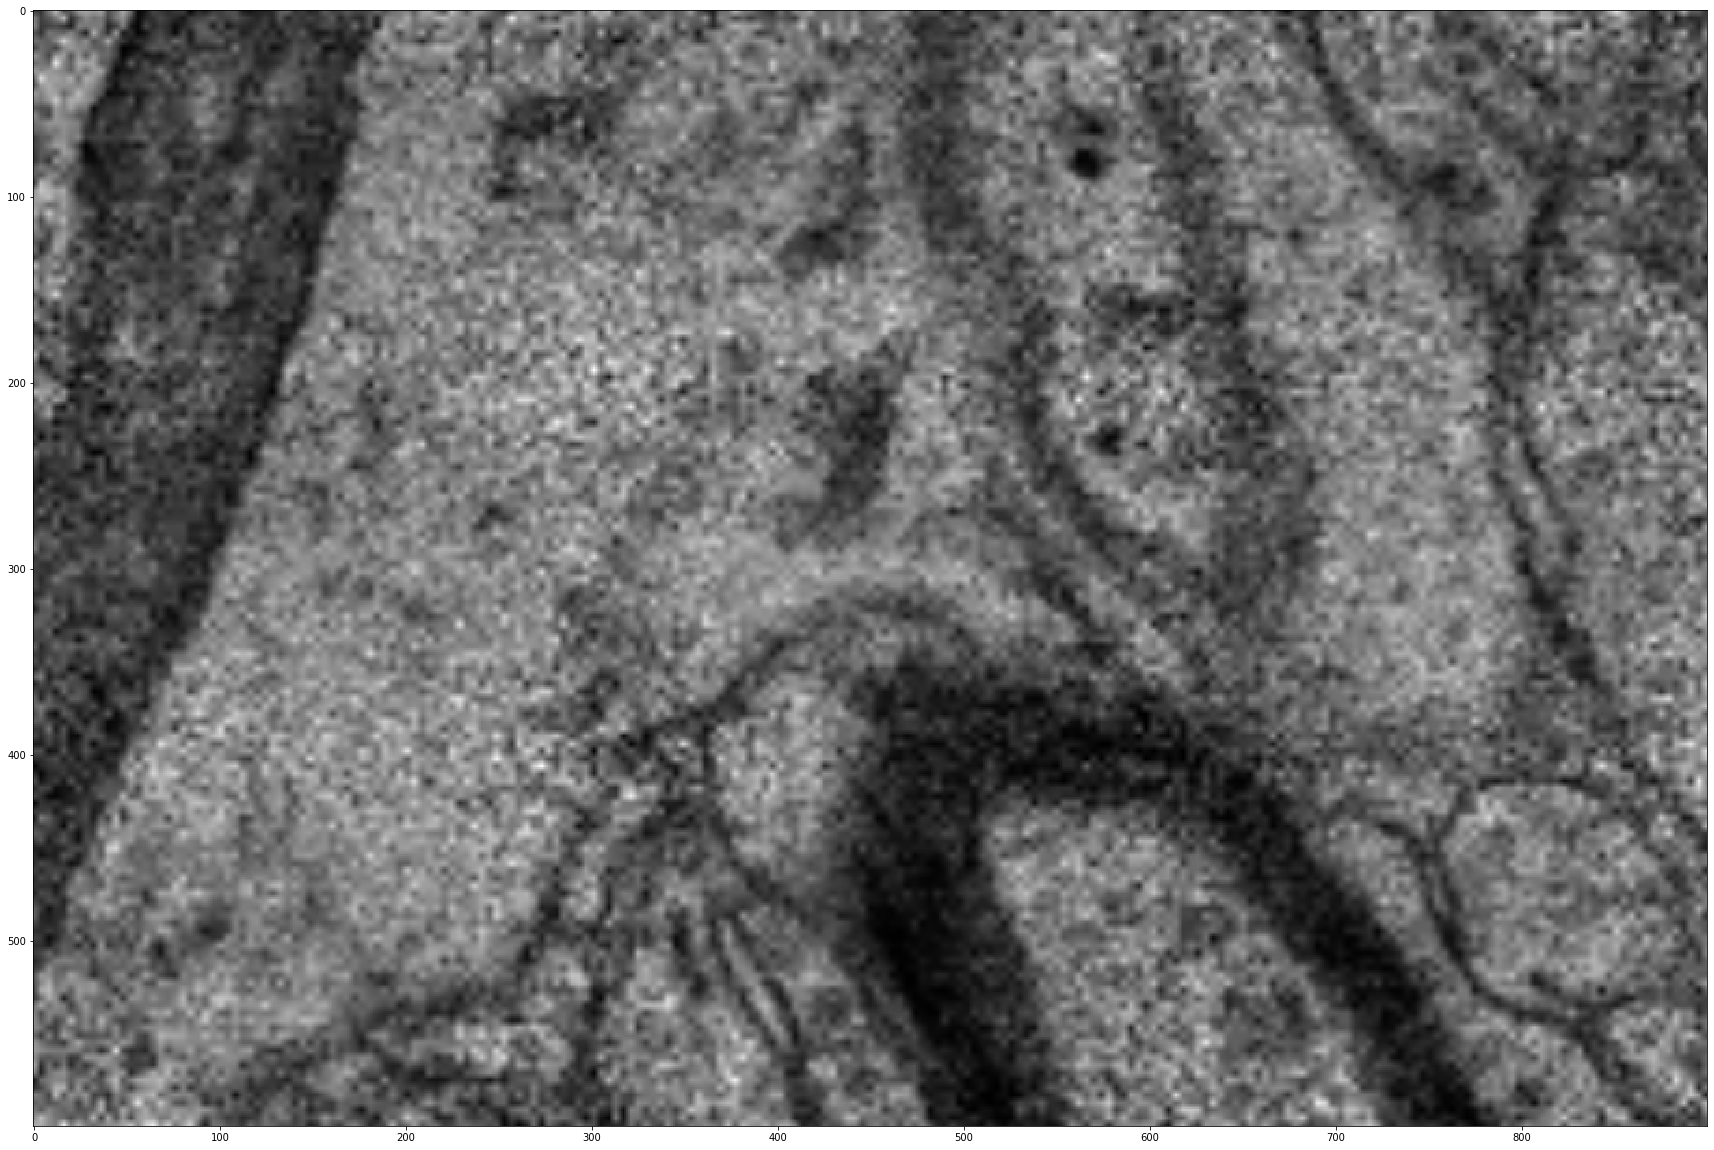

In [27]:
plt.imshow(np.squeeze(img_up), cmap=plt.cm.gray)

In [30]:
test_dir = faiv.Path('/home/alaa/Dropbox/BPHO Staff/USF/EM/training/trainsets/bilinear_test')
bilinear_process(lr_files, test_dir)

Completed 0 Bilinear Crappifications
Last file saved in /home/alaa/Dropbox/BPHO Staff/USF/EM/training/trainsets/bilinear_test/EM_train_bilinear_00001.tif
Bilinear Crappification Process Completed. Enjoy!


In [31]:
test_img = data.utils.load_img("/home/alaa/Dropbox/BPHO Staff/USF/EM/training/trainsets/bilinear_test/EM_train_bilinear_00001.tif")

In [33]:
test_img.shape

(1, 600, 900)

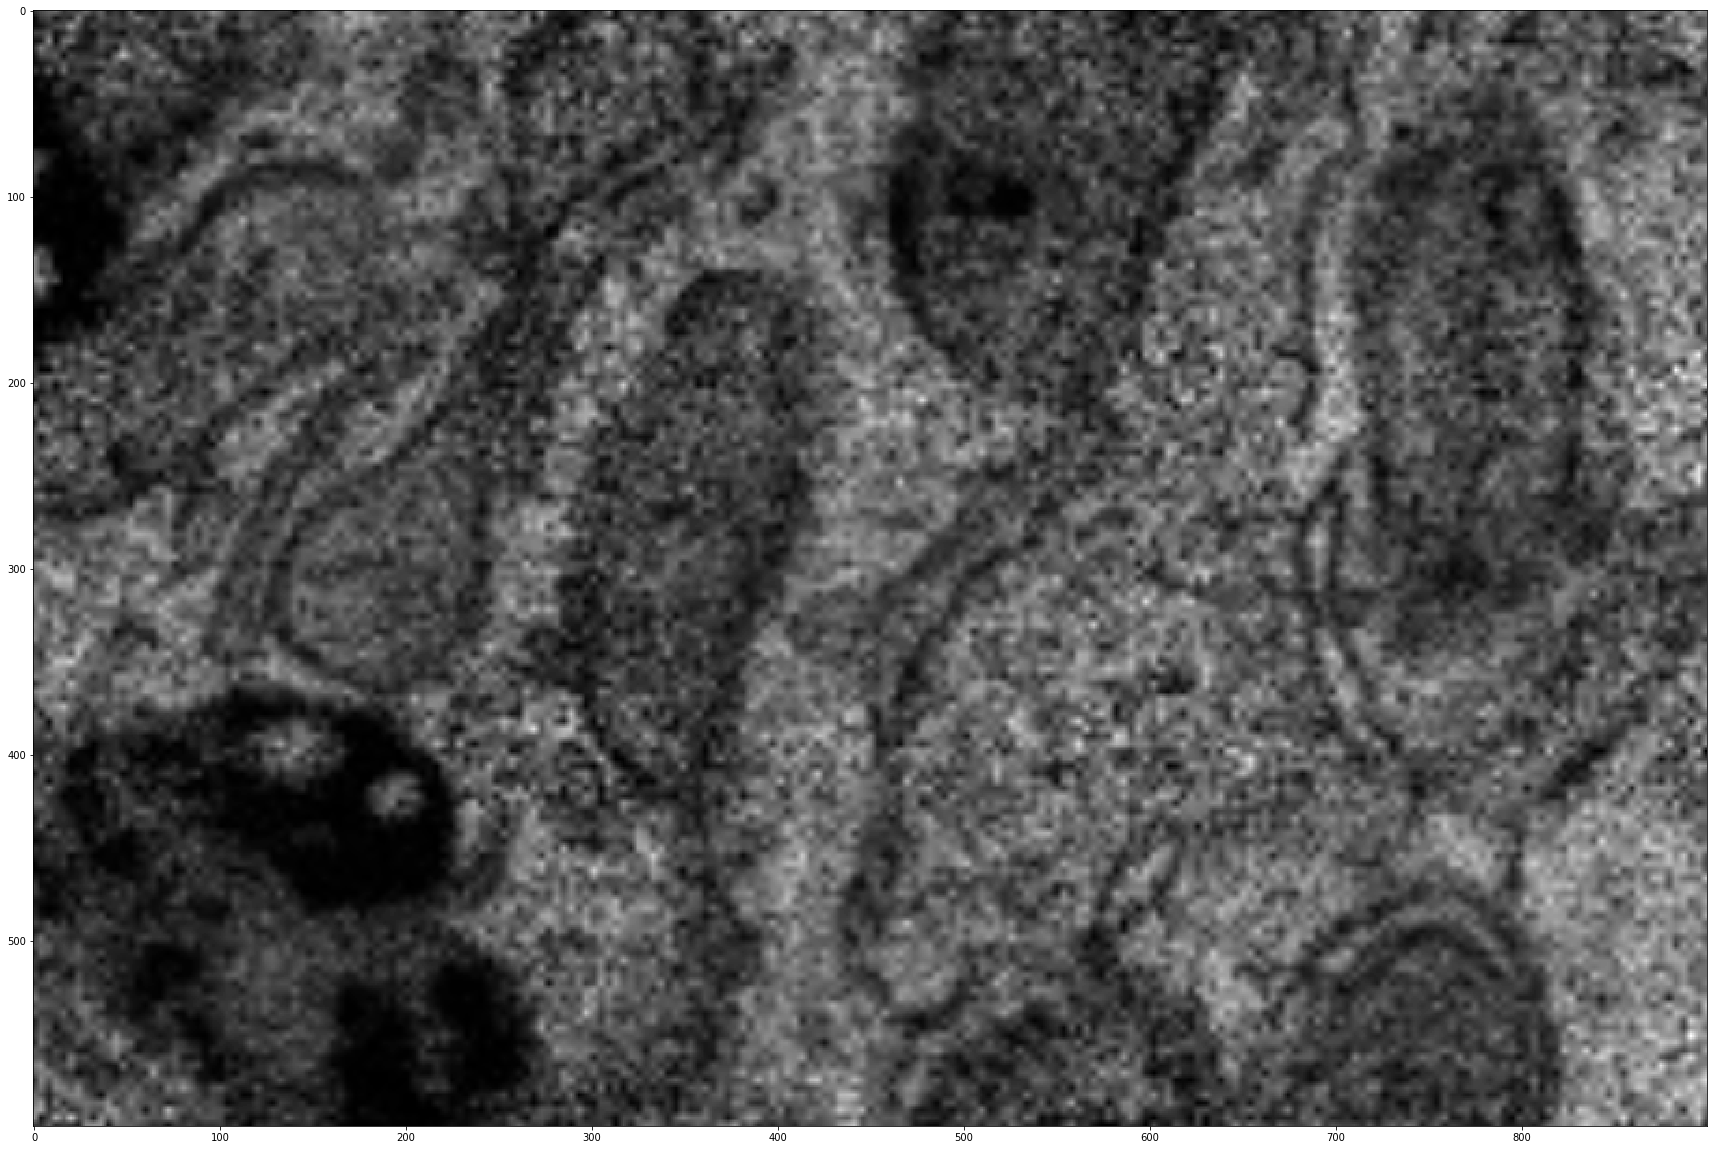

In [35]:
plt.imshow(np.squeeze(test_img), cmap=plt.cm.gray)